In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("./copy_loan_data.csv")
df.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,open_acc,grade,borrower_score,outcome
0,2500,30000,1.00,2.39320,1687,9.4,3,4.8,0.65,default
1,5600,40000,5.55,4.57170,5210,32.6,11,1.4,0.80,default
2,5375,15000,18.08,9.71600,9279,36.5,2,6.0,0.60,default
3,9000,30000,10.08,12.21520,10452,91.7,4,4.2,0.50,default
4,10000,100000,7.06,3.90888,11997,55.5,14,5.4,0.55,default


In [4]:
df.shape

(45342, 10)

In [20]:
predictors = ['payment_inc_ratio','dti','borrower_score','grade']
outcome = 'outcome'
X = df[predictors]
Y = df[outcome]

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.32247715, -1.99264452,  1.17334854,  0.13583897],
       [-0.81157035, -1.3935502 ,  2.33897628, -2.16292895],
       [ 0.39488266,  0.2562634 ,  0.78480596,  0.94716883],
       [ 0.98100076, -0.79708926,  0.00772081, -0.26982596],
       [-0.96701641, -1.19472988,  0.39626339,  0.5415039 ]])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=4,test_size=0.2)

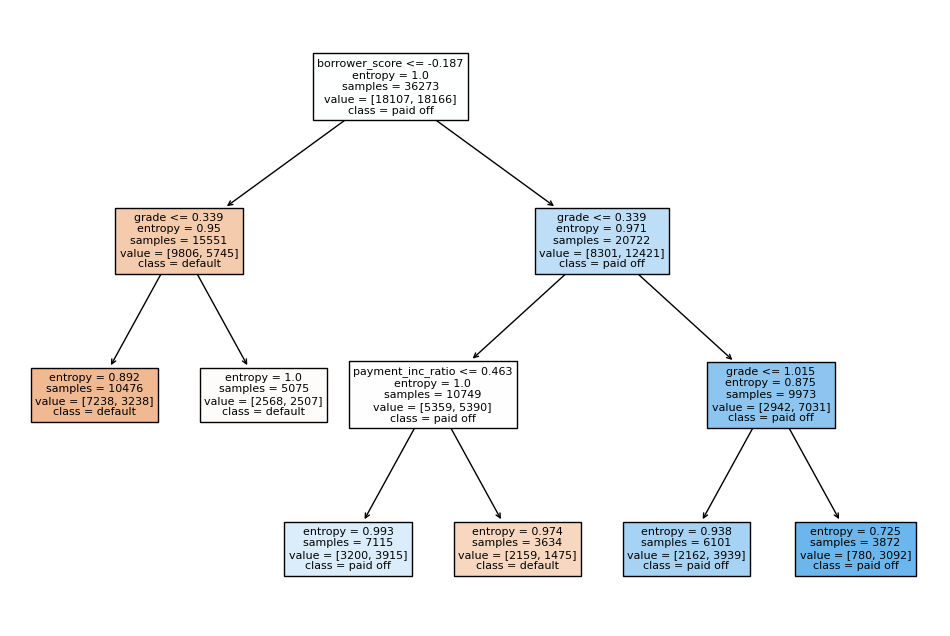

In [24]:
loan_tree = DecisionTreeClassifier(random_state=1,criterion='entropy',min_impurity_decrease=0.003)
loan_tree.fit(X_train,y_train)
#plotDecisionTree(loan_tree,feature_names=predictors,class_names=loan_tree.classes_)
plt.figure(figsize=(12,8))
plot_tree(loan_tree,filled=True,feature_names=predictors,class_names=loan_tree.classes_)
plt.show()

In [25]:
y_hat = loan_tree.predict(X_test)

In [26]:
acc_score = metrics.accuracy_score(y_test,y_hat)
print(f"The accuracy score is {acc_score}")

The accuracy score is 0.6364538537876282


In [45]:
predictors[8]

'borrower_score'

In [80]:
predictors = df.columns[0:-1]
outcome = df.columns[-1]
mean_array = np.zeros((predictors.size))

for n in range(1,(predictors.size + 1)):
    X = df[predictors[0:n]]
    Y = df[outcome]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=4,test_size=0.2)
    loan_tree = DecisionTreeClassifier(random_state=1,criterion='entropy',min_impurity_decrease=0.003)
    loan_tree.fit(X_train,y_train)
    y_hat = loan_tree.predict(X_test)
    mean_array[n-1] = metrics.accuracy_score(y_test,y_hat)


In [82]:
mean_array.shape

(9,)

/home/matias/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matias/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


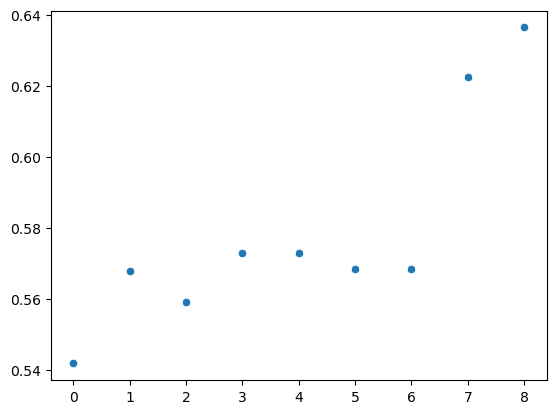

In [92]:
sns.scatterplot(x = list(range(0,predictors.size)),y = list(mean_array))
plt.show()

In [90]:
np.array(range(0,predictors.size))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [2]:
df2 = pd.read_csv('/home/matias/Desktop/AI/Machine Learning with Python/Classification/KNN/loan_data.csv')
df2.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [3]:
df2['outcome'].value_counts()

outcome
default     22671
paid off    22671
Name: count, dtype: int64

In [4]:
for n in df2.columns:
    if len(df2[n].unique()) < 20:
        print(f"column {n},\nvalues uniques: {df2[n].unique()}\n\n")

column status,
values uniques: ['Charged Off' 'Default' 'Fully Paid']


column term,
values uniques: ['60 months' '36 months']


column purpose,
values uniques: ['car' 'small_business' 'other' 'debt_consolidation' 'major_purchase'
 'credit_card' 'home_improvement' 'moving' 'house' 'medical' 'wedding'
 'vacation']


column home_ownership,
values uniques: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


column delinq_2yrs_zero,
values uniques: [1 0]


column pub_rec_zero,
values uniques: [1 0]


column outcome,
values uniques: ['default' 'paid off']


column emp_length,
values uniques: [ 1  5  4 11  2 10  3  9  8  6  0  7]


column purpose_,
values uniques: ['major_purchase' 'small_business' 'other' 'debt_consolidation'
 'credit_card' 'home_improvement' 'medical']


column home_,
values uniques: ['RENT' 'OWN' 'MORTGAGE']


column emp_len_,
values uniques: [' > 1 Year' ' < 1 Year']




In [5]:
df2.columns

Index(['Unnamed: 0', 'status', 'loan_amnt', 'term', 'annual_inc', 'dti',
       'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose',
       'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc',
       'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_',
       'borrower_score'],
      dtype='object')

In [17]:
loan_data = df2.iloc[:,:-1]
loan_data.head()
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio','revol_bal', 'revol_util','emp_len_','home_ownership']
outcome = 'outcome'
X = loan_data[predictors].values
Y = loan_data[outcome].values

In [18]:
loan_data.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year


In [19]:
X[0:5]

array([[2500, '60 months', 30000, 1.0, 2.3932, 1687, 9.4, ' > 1 Year',
        'RENT'],
       [5600, '60 months', 40000, 5.55, 4.5717, 5210, 32.6, ' > 1 Year',
        'OWN'],
       [5375, '60 months', 15000, 18.08, 9.716, 9279, 36.5, ' > 1 Year',
        'RENT'],
       [9000, '36 months', 30000, 10.08, 12.2152, 10452, 91.7,
        ' > 1 Year', 'RENT'],
       [10000, '36 months', 100000, 7.06, 3.90888, 11997, 55.5,
        ' > 1 Year', 'RENT']], dtype=object)

In [20]:
X.shape

(45342, 9)

In [21]:
Y.shape

(45342,)

As you may figure out, some features in this dataset are categorical, such as **status** or **term** or **home_ownership** or **emp_len_**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the **LabelEncoder() method**
to convert the categorical variable into dummy/indicator variables.

In [22]:
la_term = preprocessing.LabelEncoder()
la_term.fit(['60 months', '36 months'])
X[:,1] = la_term.transform(X[:,1])

la_emp = preprocessing.LabelEncoder()
la_emp.fit([' > 1 Year',' < 1 Year'])
X[:,7] = la_emp.transform(X[:,7])

la_home = preprocessing.LabelEncoder()
la_home.fit(['RENT','OWN','MORTGAGE','OTHER'])
X[:,8] = la_home.transform(X[:,8])

In [23]:
X[0:5]

array([[2500, 1, 30000, 1.0, 2.3932, 1687, 9.4, 1, 3],
       [5600, 1, 40000, 5.55, 4.5717, 5210, 32.6, 1, 2],
       [5375, 1, 15000, 18.08, 9.716, 9279, 36.5, 1, 3],
       [9000, 0, 30000, 10.08, 12.2152, 10452, 91.7, 1, 3],
       [10000, 0, 100000, 7.06, 3.90888, 11997, 55.5, 1, 3]], dtype=object)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=4,test_size=0.3)

In [25]:
print(f"{X_train.shape[0]} {y_train.shape[0]}")
print(f"{X_test.shape[0]} {y_test.shape[0]}")

31739 31739
13603 13603


In [60]:
loan_tree = DecisionTreeClassifier(random_state=4,criterion='entropy',max_depth=2)
loan_tree.fit(X_train,y_train)
y_hat = loan_tree.predict(X_test)
print(f"The accuracy of the mothe is : {metrics.accuracy_score(y_test,y_hat)}")

The accuracy of the mothe is : 0.6069249430272734


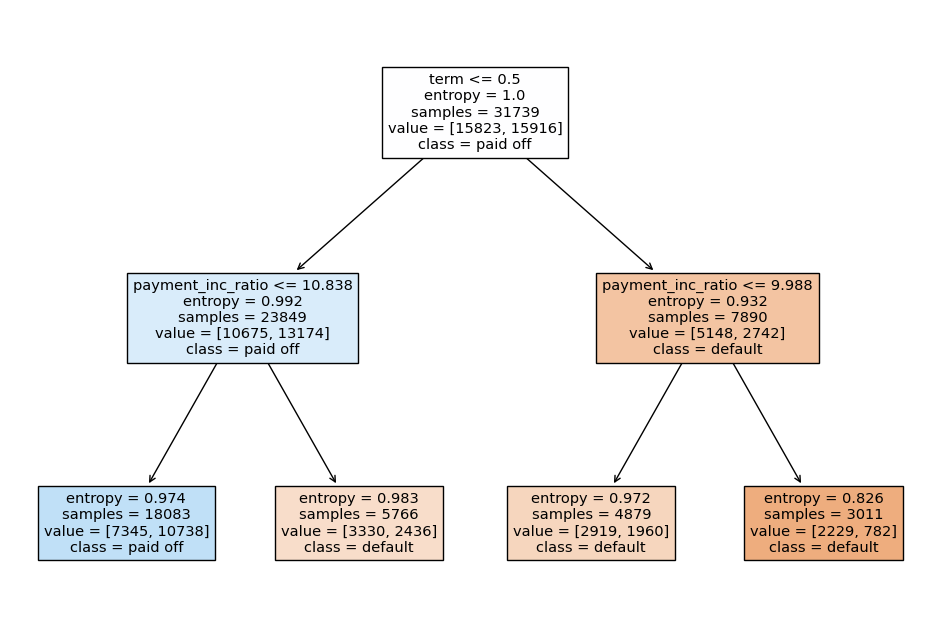

In [61]:
plt.figure(figsize=(12,8))
plot_tree(loan_tree,filled=True,feature_names=predictors,class_names=loan_tree.classes_)
plt.show()

The accuracy of the model is : 1.0


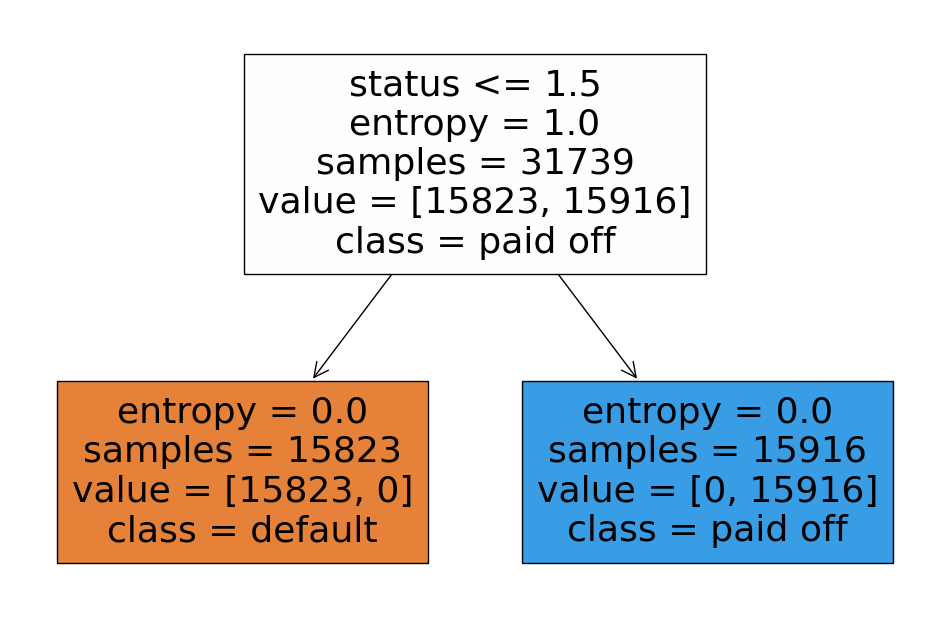

In [159]:
loan_data = df2.iloc[:,:-1]
loan_data.head()
predictors = ['status','home_ownership','term','payment_inc_ratio','dti']
outcome = 'outcome'
X = loan_data[predictors].values
Y = loan_data[outcome].values

la_status = preprocessing.LabelEncoder()
la_status.fit(['Charged Off', 'Default', 'Fully Paid'])
X[:,0] = la_status.transform(X[:,0])


la_home = preprocessing.LabelEncoder()
la_home.fit(['RENT','OWN','MORTGAGE','OTHER'])
X[:,1] = la_home.transform(X[:,1])

la_term = preprocessing.LabelEncoder()
la_term.fit(['60 months', '36 months'])
X[:,2] = la_term.transform(X[:,2])


X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=4,test_size=0.3)


loan_tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
loan_tree.fit(X_train,y_train)
y_hat = loan_tree.predict(X_test)
print(f"The accuracy of the model is : {metrics.accuracy_score(y_test,y_hat)}")


plt.figure(figsize=(12,8))
plot_tree(loan_tree,filled=True,feature_names=predictors,class_names=loan_tree.classes_)
plt.show()
